In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir 
from scipy import interpolate
from glob import glob
import sys

In [2]:
root_dir = abspath(join(pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir, style

In [5]:
style()

In [6]:
root_data_dir = abspath(join(root_dir, "Data"))
comp_dir = join(root_data_dir, "Effective-Completeness-no")
spectral_dir = join(root_data_dir, "Spectral-Class-Cluster-no")

In [7]:
name = "Effective-Volume-no"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Effective-Volume-no already exist. Good to go!


In [157]:
files = glob(join(comp_dir, "*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.36)_(0.37).hdf5'

In [9]:
name = files[2].split("/")[-1]
name

'gaia_(0.16)_(0.20).hdf5'

In [10]:
df_comp = vaex.open(join(comp_dir, name))
df_comp

#,DM,compDM
0,-2.0,0.0
1,-1.8282828282828283,0.0
2,-1.6565656565656566,0.0
3,-1.4848484848484849,0.0
4,-1.3131313131313131,0.0
...,...,...
95,14.313131313131311,0.0
96,14.484848484848484,0.0
97,14.656565656565657,0.0
98,14.828282828282827,0.0


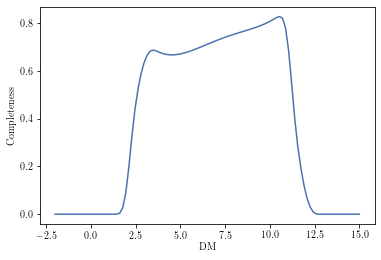

In [11]:
compDM = df_comp["compDM"].to_numpy()
DM = df_comp["DM"].to_numpy()

# plot
plt.plot(DM, compDM)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()


# plot for all

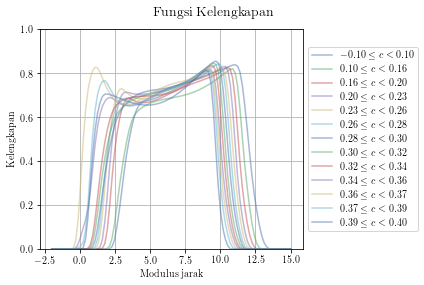

'gaia_(0.39)_(0.40).hdf5'

In [12]:
import re

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")

# plot
fig, ax = plt.subplots(figsize=(6, 4))
for file in files:
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()
    ax.plot(DM, compDM, label=r"${}\leq c < {}$".format(c[0], c[1]), alpha=0.5)
ax.set_xlabel("Modulus jarak")
ax.set_ylabel("Kelengkapan")
ax.set_ylim(0, 1)
ax.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Fungsi Kelengkapan", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# fig.savefig(join('img', "fungsi-kelengkapan-no.pdf"), dpi=200)
plt.show()

name

interpolate compDM, set to 0 if beyond the range

In [13]:
compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

compDM_interp(-20)

array(0.)

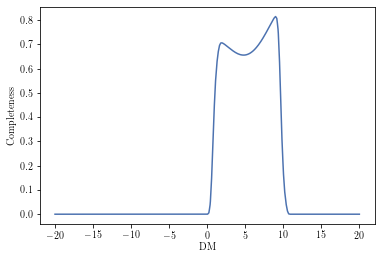

In [14]:
dms = np.linspace(-20, 20, 1000)
compDMs = compDM_interp(dms)

# plot
plt.plot(dms, compDMs)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()

In [16]:
# z1 = np.array([ 89. ,  96.5, 112. , 119. , 123.5, 168.5, 191. , 238.5, 262. ,
#        288.5, 306. , 288.5, 286.5])

# zb= 2*z1

# Z = zb[0]
R = 150
# zb
zb = 396.44960851 # pc

In [17]:
# divide space into small tube with rings
ez = np.linspace(-zb, zb, 100) #edges
er = np.linspace(0, R, 100)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2

dz = ez[1]-ez[0]

In [20]:
from tqdm import tqdm

frac = []
for zz in tqdm(z):
    real_vol = 0
    eff_vol = 0
    for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
        glat = np.arctan(zz/rr)
        dv = np.pi*(r_out**2-r_in**2)*dz
        real_vol += dv
        distance =np.sqrt(rr**2+zz**2)
        dm = 5*np.log10(distance)-5
        # if distance>50:
        eff_vol += dv*compDM_interp(dm)
    frac.append(eff_vol/real_vol)


100%|██████████| 99/99 [00:00<00:00, 376.31it/s]


(0.0, 1.0)

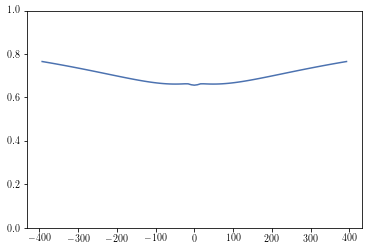

In [21]:
plt.plot(z, frac)
plt.ylim(0,1)

# all out

100%|██████████| 99/99 [00:00<00:00, 470.32it/s]


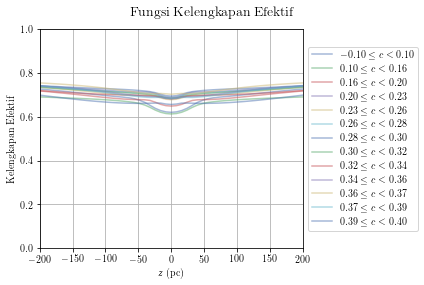

In [22]:
from tqdm import tqdm
import re
import matplotlib.pylab as pl

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")
Z = 396.44960851
R = 150
ez = np.linspace(-Z, Z, 100) #edges
er = np.linspace(0, R, 100)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2
dms = np.linspace(-20, 20, 1000)
dz = ez[1]-ez[0]
colors = pl.cm.jet(np.linspace(0,1,len(files)))
fig, ax = plt.subplots(figsize=(6, 4))
for i, file in enumerate(files):
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)
    compDMs = compDM_interp(dms)

    frac = []
    for zz in tqdm(z):
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            # if distance>50:
            eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)
    ax.plot(z, frac, label=r"${}\leq c < {}$".format(c[0], c[1]), alpha=0.5)
ax.set_xlabel(r"$z$ (pc)")
ax.set_ylabel("Kelengkapan Efektif")
ax.grid()
ax.set_ylim(0,1)
ax.set_xlim(-200, 200)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Fungsi Kelengkapan Efektif", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.savefig(join('img', "fungsi-kelengkapan-efektif-no.pdf"), dpi=200)

In [23]:
compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

In [24]:
gaia_raw = vaex.open(join(spectral_dir, name))
gaia_raw = gaia_raw.dropna()
gaia_raw.head()

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.00625673,0.780131,9.024,8.629,AAA,385049697898909184,46.3289,-45.309,0.0139833,9.66779,0.0140114,8.24085,0.0175398,10.1019,10.4569,9.58152,4332.2,3997.99,0.903831,1.20272,-1.15786,-0.301441,120.382,120.043,120.777,0.0038,0.0005,0.0442,-0.11,-0.22,-0,G,G7,-7.57663,gaia,0.203443,0.203443,1,5536.87,gspphot,6.00928,75.7563,0,4.3426,gspphot,0.00509977,0.0409002,0,0.275,lamost,0.03,0.03,1,0.28,gspspec,0.00999999,0.00999999,0,-0.09,gspspec,0.01,0.01,0,0.091236,lamost,0.075547,0.075547,1,0.395,3.60386,121.347,-36.0274,115.875,-42.427,18.6097,0.0139844,0.0140102,10.704,-24.4033,0.0241656,-0.0525592,12.4708,0.203443,0.0646595,-4.05702,0.194402,20.7241,0.0916716,-13.509,0.179307,2.94075,4.29761
1,0.0316533,0.0947691,8.589,8.19,AAA,2742050646690373248,82.9778,-61.6011,0.021514,-55.5933,0.0191799,12.4972,0.0181939,9.66359,10.0014,9.15454,4627.12,5955.44,0.962874,1.20403,-1.34164,-0.972743,79.7145,79.546,79.8795,0.0821,0.067,0.0883,-0.06,-0.15,0.03,G,G3,-11.0349,gaia,0.171548,0.171548,1,5603.31,lamost,17.93,17.93,1,4.5109,gspphot,0.0176001,0.0103002,0,-0.26,lamost,0.01,0.01,1,-0.38,gspspec,0.02,0.00999999,0,0.15,gspspec,0.02,0.00999999,0,0.1441,lamost,0.065561,0.065561,1,0.399,4.07307,80.0178,-66.1293,45.0527,-75.5447,-34.3264,0.0213106,0.0194057,-13.0195,-28.6529,-0.0203331,-0.0424899,1.78922,0.171548,0.142234,-16.9728,0.0980382,24.0483,0.0469915,-23.0379,0.0959619,2.98703,4.31993
2,0.0507728,0.449632,9.072,8.676,AAA,2850350205563267840,32.9971,-6.54952,0.0160148,-32.3406,0.0185538,9.57336,0.0174516,10.2344,10.6121,9.69135,3732.68,4331.28,0.96153,1.20626,-1.19021,-0.632656,103.676,103.442,103.922,0.0972,0.0867,0.106,-0.06,-0.19,0.05,G,G7,-9.94892,gaia,0.18701,0.18701,1,5544.38,gspphot,18.7876,15.6792,0,4.5021,gspphot,0.0124998,0.0117002,0,0.182,lamost,0.022,0.022,1,0.02,gspspec,0.02,0.01,0,0.03,gspspec,0.01,0.03,0,0.123364,lamost,0.076107,0.076107,1,0.396,3.97732,104.457,-61.7639,84.24,-12.5964,-30.4982,0.0161141,0.0184676,-15.1004,-6.2368,-0.029006,-0.0138895,-6.29517,0.18701,0.113024,-16.9521,0.151788,-0.506512,0.0578394,-18.0559,0.141022,2.95332,4.30334
3,0.0405306,0.626528,9.151,8.752,AAA,2876882555013610752,130.048,-82.6896,0.0215605,-100.373,0.0124457,6.73893,0.0208912,10.2058,10.5349,9.70439,4948.02,4571.35,1.17405,1.20355,-1.16189,-0.457203,147.42,146.941,147.886,0.1071,0.1058,0.1084,-0.06,-0.19,0.08,G,G2,-35.2067,gaia,0.17118,0.17118,1,5788.26,gspphot,2.10352,1.97998,0,4.2127,gspphot,0.00259972,0.00270033,0,-0.084,lamost,0.019,0.019,1,-0.2522,gspphot,0.00299999,0.00320001,0,0.25,gspspec,0.04,0.04,0,0.231886,lamost,0.030648,0.030648,1,0.399,3.29396,148.391,-65.5059,133.15,-99.5242,-83.7096,0.0213227,0.0128489,-58.8793,-70.0029,-0.182754,-0.217532,-37.2902,0.17118,0.180557,-57.5823,0.173496,41.3367,0.211182,-80.6685,0.181171,2.98703,4.31993
4,0.0664056,0.376784,9.797,9.405,AAA,2800216117468695808,60.9374,60.8808,0.0215121,-2.62519,0.0220201,5.9899,0.0208832,10.9234,11.2853,10.3949,2755.71,4749.54,1.16811,1.20447,-1.18968,-0.706893,160.441,158.724,162.063,0.102,0.0881,0.1166,-0.08,-0.2,0.04,G,F9,-35.7353,gaia,0.233155,0.233155,1,5650.17,gspphot,25.625,27.2686,0,4.4505,gspphot,0.0254998,0.0226002,0,0.148,lamost,0.025,0.025,1,0.16,gspspec,0.03,0.01,0,-0.02,gspspec,0.02,0.03,0,0.056319,lamost,0.046549,0.0465

In [23]:
# for latex table
# for i, zbound in enumerate(zb):
#     name = files[i].split("/")[-1] 
#     c = regex.findall(name)
#     gaia_raw = vaex.open(join(spectral_dir, name))
#     # filter no nan in 'z'
#     gaia = gaia_raw.filter("Dist>50")
#     gaia = gaia.dropna("z")
#     gaia = gaia.extract()
#     N_d_50 = len(gaia)
#     gaia = gaia_raw.filter("abs(z)<50")
#     gaia = gaia.dropna("w")
#     gaia = gaia.extract()
#     N_z_50 = len(gaia)
#     w = gaia["w"].to_numpy()

#     dispersion = np.std(w)
#     print(f"{c[0]} < c < {c[1]} & {zbound} & {N_d_50} & {N_z_50} & {dispersion:.02f} \\\\")

-0.10 < c < 0.10 & 178.0 & 1026 & 429 & 6.33 \\
0.10 < c < 0.16 & 193.0 & 909 & 310 & 7.74 \\
0.16 < c < 0.20 & 224.0 & 1451 & 467 & 8.50 \\
0.20 < c < 0.23 & 238.0 & 2727 & 819 & 9.44 \\
0.23 < c < 0.26 & 247.0 & 4446 & 1315 & 10.75 \\
0.26 < c < 0.28 & 337.0 & 4867 & 1138 & 11.97 \\
0.28 < c < 0.30 & 382.0 & 6476 & 1445 & 12.60 \\
0.30 < c < 0.32 & 477.0 & 8820 & 1569 & 13.19 \\
0.32 < c < 0.34 & 524.0 & 10114 & 1704 & 14.24 \\
0.34 < c < 0.36 & 577.0 & 12233 & 1957 & 14.46 \\
0.36 < c < 0.37 & 612.0 & 6439 & 1024 & 14.75 \\
0.37 < c < 0.39 & 577.0 & 11803 & 1894 & 14.61 \\
0.39 < c < 0.40 & 573.0 & 5753 & 905 & 15.28 \\


In [38]:
name = files[0].split("/")[-1] 
gaia = vaex.open(join(spectral_dir, name))
# gaia = gaia_raw.filter("Dist>50")
# gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.01692606345950085,0.3891393605162341,7.978000164031982,7.916999816894531,AAA,2847236045035991808,7.534960746765137,0.31428973130157245,0.028740057721734047,-7.528403412132262,0.035291653126478195,5.414626649593402,0.03218960762023926,8.257993698120117,8.308849334716797,8.131924629211426,1606.518310546875,3663.614990234375,1.0435644388198853,1.1647926568984985,-1.2447639901461083,-0.6851463533673376,185.764404296875,183.57119750976562,187.21949768066406,0.40720000863075256,0.4049000144004822,0.41269999742507935,nan,nan,nan,A,--,-1.9623053073883057,gaia,0.8112114071846008,0.8112114071846008,1.0,10111.888671875,gspphot,14.7001953125,61.91796875,0.0,4.351399898529053,gspphot,0.004600048065185547,0.0062999725341796875,0.0,nan,--,nan,nan,nan,0.04969999939203262,gspphot,0.06459999922662973,0.016599997878074646,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.06100034713745117,1.6458427462058371,184.68494038736586,-116.86610814118873,143.00643333017175,-1.4773945887055326,-7.388703621087389,0.02914644273095347,0.03495678152203822,-6.468120044174079,-1.2933209995171295,-0.049143105132327135,-0.026648281766649008,-3.766716399021818,0.8112114071846008,0.5147320000869019,-5.61240292518195,0.6289117267272132,-0.5723895823176695,0.20300791047069605,-5.730978622228241,0.5958421596550898,0.5031712031916151,2.133604850608599
1,0.0035158959649724967,0.5305083072141416,8.081000328063965,8.039999961853027,AAA,2873312200239661568,14.617414474487305,14.451251005288686,0.030547887086868286,-2.1977605786351746,0.020109251141548157,5.780108878698743,0.030021460726857185,8.32446002960205,8.370553970336914,8.213418960571289,1918.97314453125,3164.412841796875,1.0105706453323364,1.161336064338684,-1.2188784047472103,-0.5448464699442576,174.9145965576172,173.51480102539062,177.49130249023438,0.21850000321865082,0.21230000257492065,0.22370000183582306,nan,nan,nan,A,--,2.5488598346710205,gaia,0.5904097557067871,0.5904097557067871,1.0,9139.9169921875,gspphot,26.2587890625,21.2197265625,0.0,4.347700119018555,gspphot,0.006599903106689453,0.003699779510498047,0.0,nan,--,nan,nan,nan,0.040699999779462814,gspphot,0.01589999906718731,0.022099997848272324,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.0410003662109375,1.8906804241222384,173.0071216625813,-89.66730688490979,147.95687960341223,13.569288218458064,-5.435367919770953,0.030094421085801206,0.02078175176582556,-4.457293881549581,11.127545779028823,-0.028747124591811984,0.06284419546046725,-5.132948763366383,0.5904097557067871,0.306987584346683,-0.13035411751851234,0.5051422570554095,-10.490508510988937,0.18384391925197802,3.7132867437359187,0.47467831856972253,0.4207933504122871,2.028376745602959
2,0.016132811314469423,0.8453833320993638,6.625999927520752,6.639999866485596,AAA,393289609837293312,26.449678421020508,-24.96840807175537,0.02289041317999363,-8.72720196130603,0.02212526649236679,7.549027097652189,0.02850569225847721,6.791180610656738,6.807115077972412,6.732668399810791,2223.919189453125,1461.660400390625,0.9565751552581787,1.1588934659957886,-1.1377109201305777,-0.23877740044822038,132.62339782714844,132.01100158691406,133.18209838867188,0.18000000715255737,0.17739999294281006,0.18330000340938568,nan,nan,nan,A,--,-1.7445670366287231,gaia,0.21633543074131012,0.21633543074131012

# Constant Volume Prior

Assume the parallax has normal distribution with mean $\mu_\varpi$ and standard deviation $\sigma_\varpi$.
\begin{align*}
 p(\varpi|\mu_\varpi, \sigma_\varpi) = \frac{1}{\sqrt{2\pi}\sigma_\varpi} \exp\left(-\frac{(\varpi-\mu_\varpi)^2}{2\sigma_\varpi^2}\right)
\end{align*}

And $\mu_\varpi$ is the true parallax. We have relation between distance and parallax, $\varpi = 1/r$.

\begin{align*}
 p(\varpi|r, \sigma_\varpi) = \frac{1}{\sqrt{2\pi}\sigma_\varpi} \exp\left(-\frac{(\varpi-1/r)^2}{2\sigma_\varpi^2}\right)
\end{align*}

We want to infer the real parallax or the real distance, so using Bayes' theorem, we have
\begin{align*}
    p(r|\varpi, \sigma_\varpi) = \frac{p(\varpi|r, \sigma_\varpi) p(r)}{p(\varpi)}
\end{align*}

With constant volume prior, $p(r) \propto r^2$, so
\begin{align*}
    p_u(r|\varpi, \sigma_\varpi) \propto \frac{r^2}{\sigma_\varpi} \exp\left(-\frac{(\varpi-1/r)^2}{2\sigma_\varpi^2}\right)
\end{align*}

Given the star galactic latitude $b$, the distance $r$ is related to the height $z$ by
\begin{align*}
    r = \frac{z}{\sin b}
\end{align*}

so

\begin{align*}
    p(z|\varpi, \sigma_\varpi) |\textup{d}z| &= p(r|\varpi, \sigma_\varpi) |\textup{d}r| \\
    &= p(r|\varpi, \sigma_\varpi) \left|\frac{\textup{d}r}{\textup{d}z}\right| \\
    &= p(r|\varpi, \sigma_\varpi) \frac{1}{\sin b} \\
    &\propto \frac{z^2}{\sigma_\varpi \sin^3 b} \exp\left(-\frac{(\varpi-\sin b/z)^2}{2\sigma_\varpi^2}\right)
\end{align*}

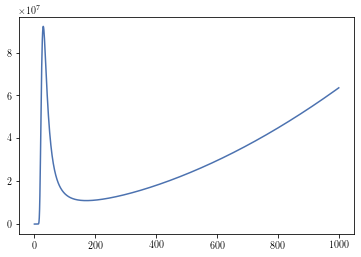

In [75]:
from scipy.stats import norm

mu_p = 20/1000
sigma_p = 5/1000
b = np.radians(30)

def z_pdf(z, b, parallax, parallax_error):
    return norm.pdf(np.sin(b)/z, loc=parallax, scale=parallax_error)*z**2/parallax_error/np.sin(b)**3

z = np.linspace(0.1, 1000, 1000)
plt.plot(z, z_pdf(z, b, mu_p, sigma_p))

  0%|          | 0/2327 [00:00<?, ?it/s]

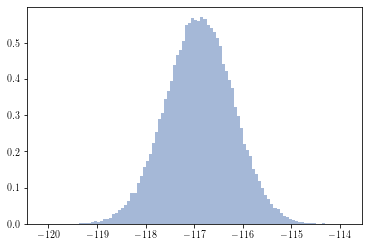

  0%|          | 1/2327 [00:00<26:47,  1.45it/s]

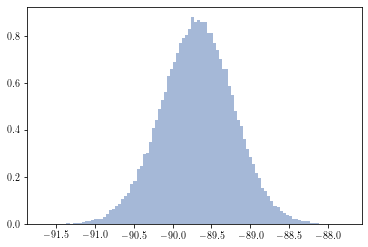

  0%|          | 2/2327 [00:03<1:15:23,  1.95s/it]

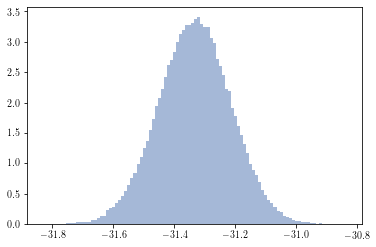

  0%|          | 3/2327 [00:05<1:19:47,  2.06s/it]

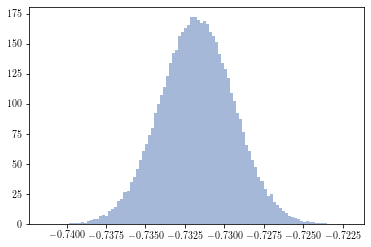

  0%|          | 3/2327 [00:06<1:22:31,  2.13s/it]


In [156]:
p = gaia['parallax'].to_numpy()/1000
p_err = gaia['e_parallax'].to_numpy()/1000
b = gaia['GLAT'].to_numpy()

def z_pdf_s(z, b, parallax, parallax_error):
    if b*z <= 0:
        return 0
    return norm.pdf(np.sin(b)/z, loc=parallax, scale=parallax_error)*z**2/parallax_error/np.sin(np.abs(b))**3
z_pdf = np.vectorize(z_pdf_s)
f = p_err/p


M = 100_000
zs = np.empty((len(p), M))

for i, (p_i, p_err_i, b_i) in enumerate(zip(p, p_err, tqdm(b))):
    # if i <3:
    #     continue
    f = p_err_i/p_i
    mode = 500
    delta = 100
    if f < 0.05:
        mode = 1/p_i*np.sin(np.abs(b_i))
        delta = p_err_i/p_i*mode
    z = np.linspace(mode-5*delta, mode+5*delta, 1000)
    if b_i < 0:
        z = -z
    pdf = z_pdf(z, b_i, p_i, p_err_i)
    pdf = pdf/pdf.max()
    mask = (pdf>1e-6)
    
    z = z[mask]
    pdf = pdf[mask]
    z = np.linspace(z.min(), z.max(), 1000)
    pdf = z_pdf(z, b_i, p_i, p_err_i)
    # plt.plot(z, pdf)
    # plt.show()
    cdf = np.cumsum(pdf)
    cdf = cdf/cdf.max()
    # plt.plot(z, cdf)
    # plt.show()
    inverse_cdf = interpolate.interp1d(cdf, z, fill_value='extrapolate', bounds_error=False)
    # print(inverse_cdf(cdf[-1]))
    # cdfs = np.linspace(0, 1, 1000)
    # plt.plot(cdfs, inverse_cdf(cdfs))
    # plt.show()
    # print(inverse_cdf(cdfs))
    zs_i = inverse_cdf(np.random.rand(M))
    zs[i] = zs_i
    plt.hist(zs_i, bins=100, density=True, alpha=0.5)
    plt.show()
    if i > 2:
        break

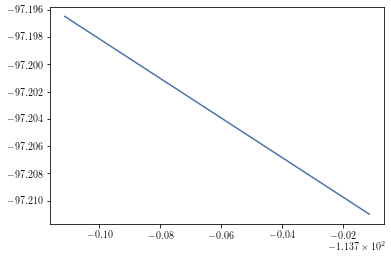

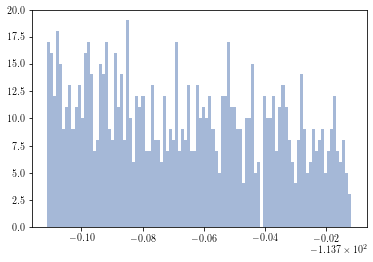

# automate

In [27]:
files

['/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.36)_(0.37).hdf5'

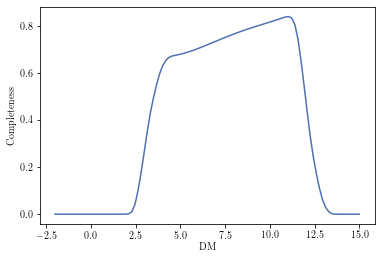

100%|██████████| 99/99 [00:00<00:00, 450.04it/s]


KeyboardInterrupt: 

In [33]:
R = 150
Z = 396.44960851
er = np.linspace(0, R, 100)
r = (er[:-1]+er[1:])/2

for file in files:
    ez = np.linspace(-Z, Z, 100) #edges
    z = (ez[:-1]+ez[1:])/2
    dz = ez[1]-ez[0]
    
    name = file.split("/")[-1]

    df_comp = vaex.open(join(comp_dir, name))

    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()

    # plot
    plt.plot(DM, compDM)
    plt.xlabel("DM")
    plt.ylabel("Completeness")
    plt.show()

    # interpolate compDM, set to 0 if beyong the range
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

    frac = []
    for zz in tqdm(z):
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            # if distance>50:
            eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)

    plt.plot(z, frac)
    plt.ylim(0,1)
    plt.show()

    compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

    gaia = vaex.open(join(spectral_dir, name))
    # gaia = gaia_raw.filter("Dist>50")
    # gaia = gaia.extract()
    print(f"data: {len(gaia)}")

    zedge = np.linspace(-Z, Z, 21) #edges
    zmid = (zedge[:-1]+zedge[1:])/2
    zs = gaia["z"].to_numpy()
    vol = np.pi*(R**2)*(2*Z)
    znum, _ = np.histogram(zs, bins=zedge)
    znum_cor = znum/(compz(zmid))
    zerr = znum_cor/np.sqrt(znum)
    znum_cor_max = znum_cor.max()
    znum_cor /= znum_cor_max
    zerr /= znum_cor_max

    zs = gaia["z"].to_numpy()
    znum_raw, _ = np.histogram(zs, bins=zedge)
    znum_raw_max = znum_raw.max()
    znum_raw = znum_raw/znum_raw_max


    dz = zedge[1]-zedge[0]
    plt.bar(zmid, znum_cor, width=dz, edgecolor="k", alpha=0.5, color="r")
    plt.bar(zmid, znum_raw, width=dz, edgecolor="k", alpha=0.5)
    plt.errorbar(zmid, znum_cor, yerr=zerr, fmt=".", color="k")
    plt.yscale("log")
    plt.show()
    df = vaex.from_arrays(zmid=zmid, znum=znum_cor, znum_raw=znum_raw, zerr=zerr)
    n = name.split("_")
    name = f"z_{n[1]}_{n[2]}"
    print(f"export to {join(data_dir, name)}")
    df.export(join(data_dir, name), progress=True)

# all out

 92%|█████████▏| 11/12 [00:03<00:00,  3.16it/s]


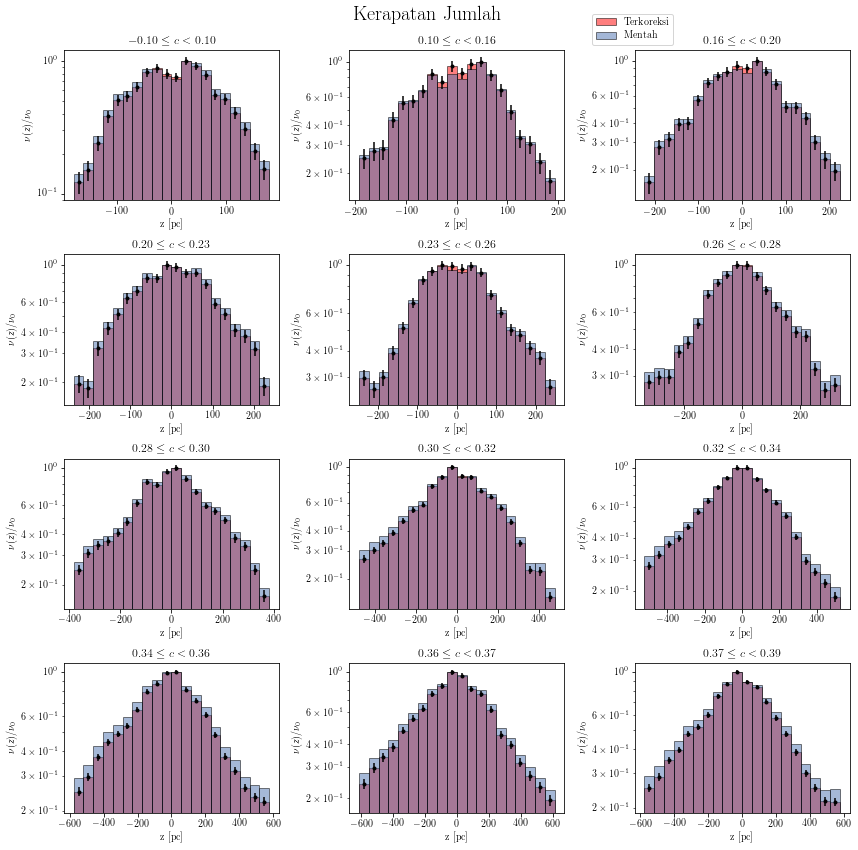

In [33]:
import re

# regex to extract the number from the file name inside ()
regex = re.compile(r"\((.*?)\)")

R = 150
er = np.linspace(0, R, 100)
r = (er[:-1]+er[1:])/2

fig, axes = plt.subplots(4, 3, figsize=(12, 12))
for i, (file, Z, ax) in enumerate(zip(files[:-1], tqdm(zb[:-1]), axes.flatten())):
    ez = np.linspace(-Z, Z, 100) #edges
    z = (ez[:-1]+ez[1:])/2
    dz = ez[1]-ez[0]
    
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))

    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()

    # interpolate compDM, set to 0 if beyong the range
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

    frac = []
    for zz in z:
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            if distance>50:
                eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)

    compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

    gaia_raw = vaex.open(join(spectral_dir, name))
    gaia = gaia_raw.filter("Dist>50")
    gaia = gaia.extract()

    zedge = np.linspace(-Z, Z, 21) #edges
    zmid = (zedge[:-1]+zedge[1:])/2
    zs = gaia["z"].to_numpy()
    vol = np.pi*(R**2)*(2*Z)
    znum, _ = np.histogram(zs, bins=zedge)
    znum_cor = znum/(compz(zmid))
    
    zerr = znum_cor/np.sqrt(znum)
    zs = gaia_raw["z"].to_numpy()
    znum_raw, _ = np.histogram(zs, bins=zedge)

    dz = zedge[1]-zedge[0]
    ax.bar(zmid, znum_cor/znum_cor.max(), width=dz, edgecolor="k", alpha=0.5, color="r")
    ax.bar(zmid, znum_raw/znum_raw.max(), width=dz, edgecolor="k", alpha=0.5)
    ax.errorbar(zmid, znum_cor/znum_cor.max(), yerr=zerr/znum_cor.max(), fmt=".", color="k")
    ax.set_yscale("log")
    ax.set_title(r"${}\leq c < {}$".format(c[0], c[1]))
    ax.set_xlabel("z [pc]")
    ax.set_ylabel(r"$\nu(z)/\nu_0$")
    if i==2:
        ax.legend(["Terkoreksi", "Mentah"], loc="lower right", bbox_to_anchor=(0.2, 1.0))
        # break
fig.tight_layout()
fig.suptitle("Kerapatan Jumlah", fontsize=20)
fig.subplots_adjust(top=0.93)
fig.savefig(join("img", "kerapatan-jumlah-no.pdf"), bbox_inches="tight")
